In [5]:
import pandas as pd

df = pd.read_csv('../data/sales.csv')


In [6]:
df = df[['Sales Channel', 'Item Type', 'Country', 'Units Sold']]


In [7]:
df_encoded = pd.get_dummies(
    df,
    columns=['Sales Channel', 'Item Type', 'Country'],
    drop_first=True
)


In [8]:
X = df_encoded.drop('Units Sold', axis=1)
y = df_encoded['Units Sold']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 4539.53670588229
R2 Score: -2.6704623613133376


In [12]:
user_input = {
    'Sales Channel': 'Online',
    'Item Type': 'Clothes',
    'Country': 'India'
}


In [13]:
input_df = pd.DataFrame([user_input])
input_encoded = pd.get_dummies(input_df)

# Align with training columns
input_encoded = input_encoded.reindex(columns=X.columns, fill_value=0)


In [14]:
predicted_sales = model.predict(input_encoded)

print("Predicted Units Sold:", int(predicted_sales[0]))


Predicted Units Sold: 2268


In [15]:
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
sales_channel = input("Enter Sales Channel (Online/Offline): ")
item_type = input("Enter Item Type: ")
country = input("Enter Country: ")


In [17]:
user_input = {
    'Sales Channel': sales_channel,
    'Item Type': item_type,
    'Country': country
}

input_df = pd.DataFrame([user_input])
input_encoded = pd.get_dummies(input_df)

# Match training columns
input_encoded = input_encoded.reindex(columns=X.columns, fill_value=0)


In [18]:
predicted_sales = model.predict(input_encoded)[0]
print("Predicted Units Sold:", int(predicted_sales))


Predicted Units Sold: 4168


In [19]:
historical_avg = y.mean()


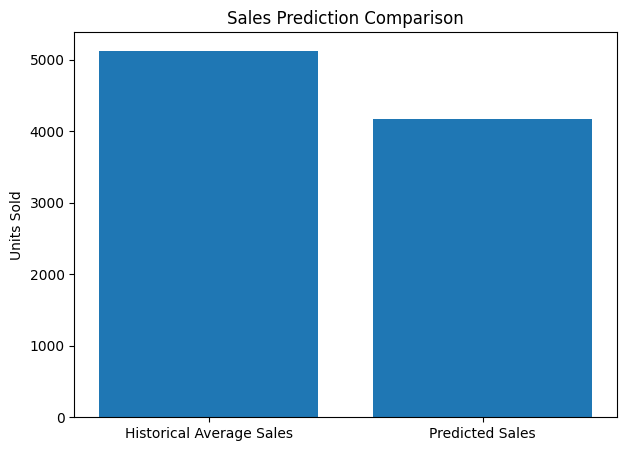

In [20]:
import matplotlib.pyplot as plt

labels = ['Historical Average Sales', 'Predicted Sales']
values = [historical_avg, predicted_sales]

plt.figure(figsize=(7,5))
plt.bar(labels, values)
plt.title('Sales Prediction Comparison')
plt.ylabel('Units Sold')
plt.show()
